<a href="https://colab.research.google.com/github/Nidarshan619/Planets/blob/master/DLinPytorch_Book/p1ch7/2_birds_airplanes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import torch

torch.set_printoptions(edgeitems=2)
torch.manual_seed(123)

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

In [4]:
from torchvision import datasets, transforms
data_path = '../data-unversioned/p1ch7/'
cifar10 = datasets.CIFAR10(
    data_path, train=True, download=True,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ../data-unversioned/p1ch7/cifar-10-python.tar.gz to ../data-unversioned/p1ch7/


In [5]:
cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=True,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

Files already downloaded and verified


In [6]:
class_names = ['airplane', 'bird']

In [7]:
label_map = {0: 0, 2: 1}
class_names = ['airplane', 'bird']
cifar2 = [(img, label_map[label])
          for img, label in cifar10 
          if label in [0, 2]]
cifar2_val = [(img, label_map[label])
              for img, label in cifar10_val
              if label in [0, 2]]

In [11]:
import torch.nn as nn

n_out = 2

model = nn.Sequential(
            nn.Linear(
                3072,  # <1>
                512,   # <2>
            ),
            nn.Tanh(),
            nn.Linear(
                512,   # <2>
                n_out, # <3>
            )
        )

In [20]:
import torch.nn as nn

model = nn.Sequential(
    nn.Linear(3072,512),
    nn.Tanh(),
    nn.Linear(512,2),
    nn.Softmax(dim=1)
)

In [9]:
def softmax(x):
    return torch.exp(x) / torch.exp(x).sum()

In [22]:
import torch

In [12]:
softmax(x).sum()

tensor(1.)

In [23]:
softmax = nn.Softmax(dim=1)

x = torch.tensor([[1.0, 2.0, 3.0],
                  [1.0, 2.0, 3.0]])

softmax(x)

tensor([[0.0900, 0.2447, 0.6652],
        [0.0900, 0.2447, 0.6652]])

In [19]:
model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.Softmax(dim=1))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


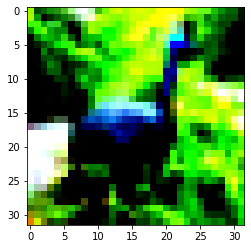

In [30]:
img, _ = cifar2[0]
import matplotlib.pyplot as plt


plt.imshow(img.permute(1, 2, 0))
plt.show()

In [31]:
img.shape


torch.Size([3, 32, 32])

In [26]:
img.view(-1).shape


torch.Size([3072])

In [27]:
img_batch = img.view(-1).unsqueeze(0)

In [28]:
img_batch.shape

torch.Size([1, 3072])

In [37]:
out = model(img_batch)
out

tensor([[0.4659, 0.5341]], grad_fn=<SoftmaxBackward>)

In [34]:
_, index = torch.max(out, dim=0)

index

tensor([0, 0])

In [39]:
out = torch.tensor([
    [0.6, 0.4],
    [0.9, 0.1],
    [0.3, 0.7],
    [0.2, 0.8],
])
out.shape

torch.Size([4, 2])

In [40]:

class_index = torch.tensor([0, 0, 1, 1]).unsqueeze(1)
class_index.shape

torch.Size([4, 1])

In [45]:
out = torch.tensor([
    [0.6, 0.4],
    [0.9, 0.1],
    [0.3, 0.7],
    [0.2, 0.8],
])
class_index = torch.tensor([0, 0, 1, 1]).unsqueeze(1)

truth = torch.zeros((4,2))
truth.scatter_(dim=1, index=class_index, value=1.0)
truth

tensor([[1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.]])

In [46]:
def mse(out):
    return ((out - truth) ** 2).sum(dim=1).mean()
mse(out)

tensor(0.1500)

In [47]:
out

tensor([[0.6000, 0.4000],
        [0.9000, 0.1000],
        [0.3000, 0.7000],
        [0.2000, 0.8000]])

In [49]:
out.gather(dim=1, index=class_index)

tensor([[0.6000],
        [0.9000],
        [0.7000],
        [0.8000]])

In [50]:
def likelihood(out):
    prod = 1.0
    for x in out.gather(dim=1, index=class_index):
        prod *= x
    return prod

likelihood(out)

tensor([0.3024])

In [51]:
def neg_log_likelihood(out):
    return -likelihood(out).log()

neg_log_likelihood(out)

tensor([1.1960])

In [55]:
out0 = out.clone().detach()
out0[0]

tensor([0.6000, 0.4000])

In [57]:
out0 = out.clone().detach()
out0[0] = torch.tensor([0.9, 0.1]) # more right

out2 = out.clone().detach()
out2[0] = torch.tensor([0.4, 0.6]) # slightly wrong

out3 = out.clone().detach()
out3[0] = torch.tensor([0.1, 0.9]) # very wrong

mse_comparison = torch.tensor([mse(o) for o in [out0, out, out2, out3]])
mse_comparison

tensor([0.0750, 0.1500, 0.2500, 0.4750])

In [61]:
[out0, out, out2, out3]


[tensor([[0.9000, 0.1000],
         [0.9000, 0.1000],
         [0.3000, 0.7000],
         [0.2000, 0.8000]]), tensor([[0.6000, 0.4000],
         [0.9000, 0.1000],
         [0.3000, 0.7000],
         [0.2000, 0.8000]]), tensor([[0.4000, 0.6000],
         [0.9000, 0.1000],
         [0.3000, 0.7000],
         [0.2000, 0.8000]]), tensor([[0.1000, 0.9000],
         [0.9000, 0.1000],
         [0.3000, 0.7000],
         [0.2000, 0.8000]])]

In [62]:
((mse_comparison / mse_comparison[1]) - 1) * 100

tensor([-50.0000,   0.0000,  66.6667, 216.6667])

In [64]:
nll_comparison = torch.tensor([neg_log_likelihood(o) 
                               for o in [out0, out, out2, out3]])
nll_comparison

tensor([0.7905, 1.1960, 1.6015, 2.9878])

In [65]:
((nll_comparison / nll_comparison[1]) - 1) * 100

tensor([-33.9016,   0.0000,  33.9016, 149.8121])

In [66]:
softmax = nn.Softmax(dim=1)

log_softmax = nn.LogSoftmax(dim=1)

x = torch.tensor([[0.0, 104.0]])

log_softmax(x)

tensor([[-104.,    0.]])

In [29]:
softmax = nn.Softmax(dim=1)

log_softmax = nn.LogSoftmax(dim=1)

x = torch.tensor([[0.0, 104.0]])

softmax(x)

tensor([[0., 1.]])

In [30]:
torch.log(softmax(x))

tensor([[-inf, 0.]])

In [31]:
log_softmax(x)

tensor([[-104.,    0.]])

In [32]:
torch.exp(log_softmax(x))

tensor([[0., 1.]])

In [67]:
model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim=1))

In [34]:
loss = nn.NLLLoss()

In [35]:
img, label = cifar2[0]

out = model(img.view(-1).unsqueeze(0))

loss(out, torch.tensor([label]))

tensor(0.5077, grad_fn=<NllLossBackward>)

In [68]:
import torch
import torch.nn as nn
import torch.optim as optim

model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim=1))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.NLLLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for img, label in cifar2:
        out = model(img.view(-1).unsqueeze(0))
        loss = loss_fn(out, torch.tensor([label]))
                
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 5.521080
Epoch: 1, Loss: 6.631064
Epoch: 2, Loss: 6.961488
Epoch: 3, Loss: 2.411923
Epoch: 4, Loss: 3.662627
Epoch: 5, Loss: 8.060578
Epoch: 6, Loss: 5.514404
Epoch: 7, Loss: 7.718280
Epoch: 8, Loss: 11.262946
Epoch: 9, Loss: 9.005001
Epoch: 10, Loss: 7.300039
Epoch: 11, Loss: 6.046356


KeyboardInterrupt: ignored

In [69]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=True)

In [70]:
import torch
import torch.nn as nn
import torch.optim as optim

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=True)

model = nn.Sequential(
            nn.Linear(3072, 128),
            nn.Tanh(),
            nn.Linear(128, 2),
            nn.LogSoftmax(dim=1))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.NLLLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.304630
Epoch: 1, Loss: 0.379212
Epoch: 2, Loss: 0.278911
Epoch: 3, Loss: 0.342303
Epoch: 4, Loss: 0.692132
Epoch: 5, Loss: 0.401301
Epoch: 6, Loss: 0.559801
Epoch: 7, Loss: 1.145437
Epoch: 8, Loss: 0.336053
Epoch: 9, Loss: 0.396320
Epoch: 10, Loss: 0.230480
Epoch: 11, Loss: 0.328398
Epoch: 12, Loss: 0.241683
Epoch: 13, Loss: 0.323952
Epoch: 14, Loss: 0.241883
Epoch: 15, Loss: 0.359749
Epoch: 16, Loss: 0.367992
Epoch: 17, Loss: 0.190471
Epoch: 18, Loss: 0.339295
Epoch: 19, Loss: 0.342957
Epoch: 20, Loss: 0.113829
Epoch: 21, Loss: 0.496458
Epoch: 22, Loss: 0.403445
Epoch: 23, Loss: 0.122832
Epoch: 24, Loss: 0.121683
Epoch: 25, Loss: 0.105253
Epoch: 26, Loss: 0.266581
Epoch: 27, Loss: 0.169447
Epoch: 28, Loss: 0.354466
Epoch: 29, Loss: 0.120999
Epoch: 30, Loss: 0.088212
Epoch: 31, Loss: 0.194877
Epoch: 32, Loss: 0.110527
Epoch: 33, Loss: 0.161499
Epoch: 34, Loss: 0.276330
Epoch: 35, Loss: 0.244609
Epoch: 36, Loss: 0.073222
Epoch: 37, Loss: 0.312940
Epoch: 38, Loss: 0.064

In [71]:
import torch
import torch.nn as nn
import torch.optim as optim

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=True)

model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim=1))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.NLLLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.323365
Epoch: 1, Loss: 0.569606
Epoch: 2, Loss: 0.309744
Epoch: 3, Loss: 0.684859
Epoch: 4, Loss: 0.403737
Epoch: 5, Loss: 0.428984
Epoch: 6, Loss: 0.420047
Epoch: 7, Loss: 0.195260
Epoch: 8, Loss: 0.275211
Epoch: 9, Loss: 0.379513
Epoch: 10, Loss: 0.386814
Epoch: 11, Loss: 0.254065
Epoch: 12, Loss: 0.571213
Epoch: 13, Loss: 0.227990
Epoch: 14, Loss: 0.267510
Epoch: 15, Loss: 0.270774
Epoch: 16, Loss: 0.358379
Epoch: 17, Loss: 0.164817
Epoch: 18, Loss: 0.290902
Epoch: 19, Loss: 0.352458
Epoch: 20, Loss: 0.393801
Epoch: 21, Loss: 0.198644
Epoch: 22, Loss: 0.282564
Epoch: 23, Loss: 0.294372
Epoch: 24, Loss: 0.175899
Epoch: 25, Loss: 0.972303
Epoch: 26, Loss: 0.607013
Epoch: 27, Loss: 0.318232
Epoch: 28, Loss: 0.360907
Epoch: 29, Loss: 0.218643
Epoch: 30, Loss: 0.213160
Epoch: 31, Loss: 0.278136
Epoch: 32, Loss: 0.083347
Epoch: 33, Loss: 0.139568
Epoch: 34, Loss: 0.210517
Epoch: 35, Loss: 0.269539
Epoch: 36, Loss: 0.054896
Epoch: 37, Loss: 0.248001
Epoch: 38, Loss: 0.035

In [72]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 0.993900


In [73]:
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64,
                                         shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 0.799000


In [74]:
model = nn.Sequential(
            nn.Linear(3072, 1024),
            nn.Tanh(),
            nn.Linear(1024, 512),
            nn.Tanh(),
            nn.Linear(512, 128),
            nn.Tanh(),
            nn.Linear(128, 2),
            nn.LogSoftmax(dim=1))

In [75]:
model = nn.Sequential(
            nn.Linear(3072, 1024),
            nn.Tanh(),
            nn.Linear(1024, 512),
            nn.Tanh(),
            nn.Linear(512, 128),
            nn.Tanh(),
            nn.Linear(128, 2))

loss_fn = nn.CrossEntropyLoss()

In [76]:
import torch
import torch.nn as nn
import torch.optim as optim

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=True)

model = nn.Sequential(
            nn.Linear(3072, 1024),
            nn.Tanh(),
            nn.Linear(1024, 512),
            nn.Tanh(),
            nn.Linear(512, 128),
            nn.Tanh(),
            nn.Linear(128, 2))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.CrossEntropyLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.606541
Epoch: 1, Loss: 0.296298
Epoch: 2, Loss: 0.548450
Epoch: 3, Loss: 0.352057
Epoch: 4, Loss: 0.513814
Epoch: 5, Loss: 0.298070
Epoch: 6, Loss: 0.310008
Epoch: 7, Loss: 0.279517
Epoch: 8, Loss: 0.450429
Epoch: 9, Loss: 0.493464
Epoch: 10, Loss: 0.158903
Epoch: 11, Loss: 0.205689
Epoch: 12, Loss: 0.675885
Epoch: 13, Loss: 0.528560
Epoch: 14, Loss: 0.303480
Epoch: 15, Loss: 0.406258
Epoch: 16, Loss: 0.460087
Epoch: 17, Loss: 0.242948
Epoch: 18, Loss: 0.323392
Epoch: 19, Loss: 0.189300
Epoch: 20, Loss: 0.118173
Epoch: 21, Loss: 0.550635
Epoch: 22, Loss: 0.247187
Epoch: 23, Loss: 0.239558
Epoch: 24, Loss: 0.076905
Epoch: 25, Loss: 0.213021
Epoch: 26, Loss: 0.459854
Epoch: 27, Loss: 0.914460
Epoch: 28, Loss: 0.076791
Epoch: 29, Loss: 0.384681
Epoch: 30, Loss: 0.198810
Epoch: 31, Loss: 0.074461
Epoch: 32, Loss: 0.191667
Epoch: 33, Loss: 0.243564
Epoch: 34, Loss: 0.118793
Epoch: 35, Loss: 0.171756
Epoch: 36, Loss: 0.102273
Epoch: 37, Loss: 0.185547
Epoch: 38, Loss: 0.186

In [77]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 1.000000


In [78]:
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64,
                                         shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 0.804000


In [79]:
sum([p.numel() for p in model.parameters()])

3737474

In [80]:
sum([p.numel() for p in model.parameters() if p.requires_grad == True])

3737474

In [81]:
first_model = nn.Sequential(
                nn.Linear(3072, 512),
                nn.Tanh(),
                nn.Linear(512, 2),
                nn.LogSoftmax(dim=1))

sum([p.numel() for p in first_model.parameters()])

1574402

In [82]:
sum([p.numel() for p in nn.Linear(3072, 512).parameters()])

1573376

In [83]:
sum([p.numel() for p in nn.Linear(3072, 1024).parameters()])

3146752

In [84]:
linear = nn.Linear(3072, 1024)

linear.weight.shape, linear.bias.shape

(torch.Size([1024, 3072]), torch.Size([1024]))

In [ ]:
conv = nn.Conv2d(3, 16, kernel_size=3)

In [ ]:
conv.weight.shape

In [ ]:
conv.bias.shape

In [ ]:
img, _ = cifar2[0]

output = conv(img.unsqueeze(0))

In [ ]:
img.unsqueeze(0).shape, output.shape

In [ ]:
plt.imshow(img.permute(1, 2, 0), cmap='gray')
plt.show()

In [ ]:
plt.imshow(output[0, 0].detach(), cmap='gray')
plt.show()

In [ ]:
output.shape

In [ ]:
conv = nn.Conv2d(3, 1, kernel_size=3, padding=1)

In [ ]:
output = conv(img.unsqueeze(0))

output.shape

In [ ]:
with torch.no_grad():
    conv.bias.zero_()

In [ ]:
with torch.no_grad():
    conv.weight.fill_(1.0 / 9.0)

In [ ]:
output = conv(img.unsqueeze(0))
plt.imshow(output[0, 0].detach(), cmap='gray')
plt.show()

In [ ]:
conv = nn.Conv2d(3, 1, kernel_size=3, padding=1)

with torch.no_grad():
    conv.weight[:] = torch.tensor([[-1.0, 0.0, 1.0],
                                   [-1.0, 0.0, 1.0],
                                   [-1.0, 0.0, 1.0]])
    conv.bias.zero_()

In [ ]:
output = conv(img.unsqueeze(0))
plt.imshow(output[0, 0].detach(), cmap='gray')
plt.show()

In [ ]:
pool = nn.MaxPool2d(2)

In [ ]:
output = pool(img.unsqueeze(0))

output.shape

In [ ]:
model = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.Tanh(),
            nn.MaxPool2d(2),
            nn.Conv2d(16, 8, kernel_size=3, padding=1),
            nn.Tanh(),
            nn.MaxPool2d(2),
            ...)

In [ ]:
model = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.Tanh(),
            nn.MaxPool2d(2),
            nn.Conv2d(16, 8, kernel_size=3, padding=1),
            nn.Tanh(),
            nn.MaxPool2d(2),
            # WARNING: something missing here
            nn.Linear(512, 32),
            nn.Tanh(),
            nn.Linear(32, 2))

In [ ]:
sum([p.numel() for p in model.parameters()])

In [ ]:
model(img.unsqueeze(0))

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.act1 = nn.Tanh()
        self.pool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.act2 = nn.Tanh()
        self.pool2 = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.act4 = nn.Tanh()
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        out = self.pool1(self.act1(self.conv1(x)))
        out = self.pool2(self.act2(self.conv2(out)))
        out = out.view(-1, 8 * 8 * 8)
        out = self.act4(self.fc1(out))
        out = self.fc2(out)
        return out

In [ ]:
model = Net()

sum([p.numel() for p in model.parameters()])

In [ ]:
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
        out = out.view(-1, 8 * 8 * 8)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out

In [ ]:
model = Net()
model(img.unsqueeze(0))

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=True)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = F.max_pool2d(torch.relu(self.conv1(x)), 2)
        out = F.max_pool2d(torch.relu(self.conv2(out)), 2)
        out = out.view(-1, 8 * 8 * 8)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out
    
model = Net()

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.CrossEntropyLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs)
        loss = loss_fn(outputs, labels)
                
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

In [ ]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        outputs = model(imgs)
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

In [ ]:
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64,
                                         shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        outputs = model(imgs)
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = F.max_pool2d(torch.relu(self.conv1(x)), 2)
        out = F.max_pool2d(torch.relu(self.conv2(out)), 2)
        out = out.view(-1, 8 * 8 * 8)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out
    
model = Net()
sum([p.numel() for p in model.parameters()])

In [ ]:
model = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.Tanh(),
            nn.MaxPool2d(2),
            nn.Conv2d(16, 8, kernel_size=3, padding=1),
            nn.Tanh(),
            nn.MaxPool2d(2),
            nn.Linear(8*8*8, 32),
            nn.Tanh(),
            nn.Linear(32, 2))

model(img.unsqueeze(0))